模拟光子数: 160000


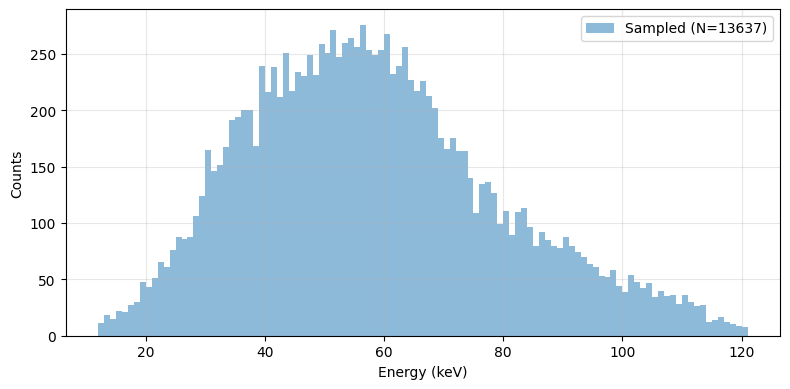

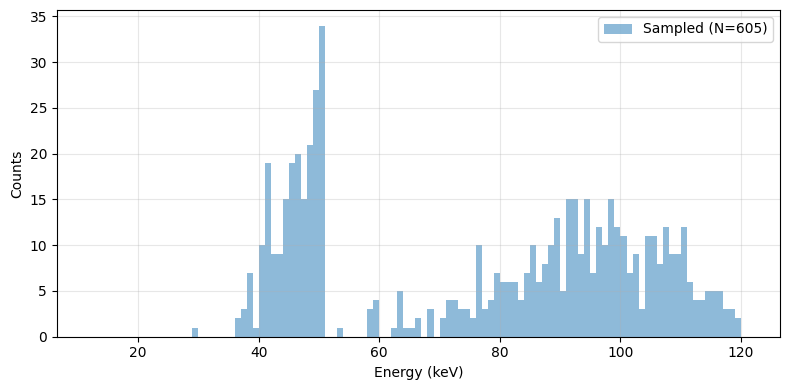

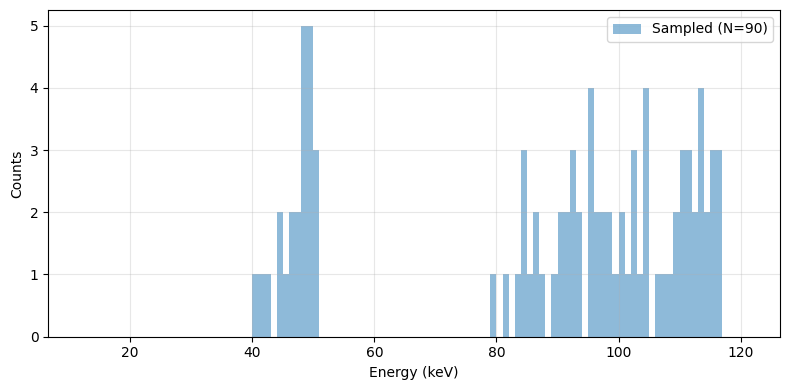

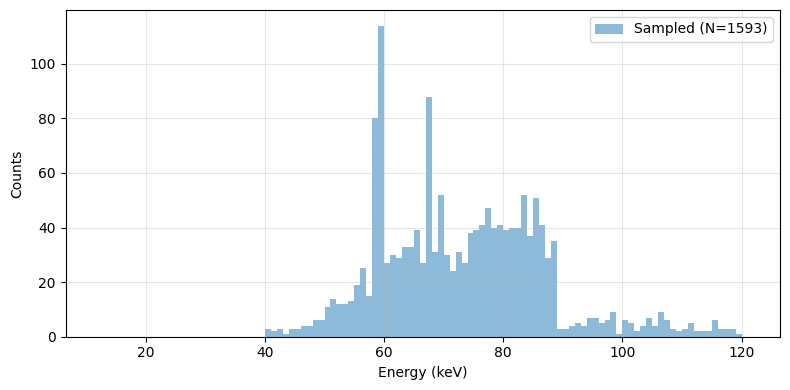

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from counting_model_utils import load_signal_from_spek_abs, integral_spectrum
# ---------------- 参数 ---------------- 
integral_time = 400e-6  # 积分时间[s]   400（us）
dead_time = 25e-9       # 死时间[s]     15 ns
rate = 400e6            # 最大输入光子率 (photons/s)
sid = 0.4               # [m]
lenth_pixel = 340e-6    # 晶体尺寸[cm]   340（um）
amp = 1

n_photons = int(integral_time * rate)
print("模拟光子数:", n_photons)

# ---------------- 信号 + 噪声源 ---------------- 
signal_120, E, flux_pix, counts = load_signal_from_spek_abs(
    "spectrum_file/spek_120.txt",
    I_mA = 20.0 * amp, t_s = integral_time,
    A_pix = lenth_pixel * lenth_pixel, d = sid,
    res_sigma=8.0,
    E_out=None,       # 或 np.arange(10, 121, 0.5) 做插值
    plot=True
)


signal_120_Gd_0_6, E, flux_pix, counts = load_signal_from_spek_abs(
    "spectrum_file/spectrum_filtered_Gd_0_6mm.txt",
    I_mA = 20.0 * amp, t_s = integral_time,
    A_pix = lenth_pixel * lenth_pixel, d = sid,
    res_sigma=0,
    E_out=None,       # 或 np.arange(10, 121, 0.5) 做插值
    plot=True
)

signal_120_Gd_1_2, E, flux_pix, counts = load_signal_from_spek_abs(
    "spectrum_file/spectrum_filtered_Gd_1_2mm.txt",
    I_mA = 20.0 * amp, t_s = integral_time,
    A_pix = lenth_pixel * lenth_pixel, d = sid,
    res_sigma=0.0,
    E_out=None,       # 或 np.arange(10, 121, 0.5) 做插值
    plot=True
)

signal_120_Pb_0_5, E, flux_pix, counts = load_signal_from_spek_abs(
    "spectrum_file/spectrum_filtered_Pb_0_5mm.txt",
    I_mA = 20.0 * amp, t_s = integral_time,
    A_pix = lenth_pixel * lenth_pixel, d = sid,
    res_sigma=0.0,
    E_out=None,       # 或 np.arange(10, 121, 0.5) 做插值
    plot=True
)

# 噪声 
noise = np.random.normal(28, 10, int(n_photons*0.1))   # 噪声峰

# events_120_Gd = np.concatenate([signal_120_Gd, noise])
# events_120    = np.concatenate([signal_120, noise]) 

events_120    = np.concatenate([signal_120, noise])  
events_120_Gd_0_6 = np.concatenate([signal_120_Gd_0_6]) 
events_120_Gd_1_2 = np.concatenate([signal_120_Gd_1_2])

events_120_Pb_0_5 = np.concatenate([signal_120_Pb_0_5])

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# # --- 公共能量轴（统一 bins） ---
# if len(signal_120_Gd) == 0 or len(signal_120) == 0:
#     raise ValueError("有一个样本为空，检查前面的采样参数/期望计数。")

# emin = min(signal_120_Gd.min(), signal_120.min())
# emax = max(signal_120_Gd.max(), signal_120.max())
# bin_width = 1.0  # keV：你也可以改成 0.5 等
# bins = np.arange(np.floor(emin), np.ceil(emax) + bin_width, bin_width)

# # --- 叠加直方图 ---
# plt.figure(figsize=(8,5))
# plt.hist(signal_120_Gd, bins=bins, density=False, alpha=0.5,
#          label="120 kV 0.6mm GOS ", histtype="stepfilled")
# plt.hist(signal_120, bins=bins, density=False, alpha=0.5,
#          label="120 kV ", histtype="stepfilled")

# plt.xlabel("Energy (keV)")
# plt.ylabel("Counts" )  # 若 density=False 改成 "Counts"
# plt.title("Sampled spectra at 120 vs 120 kV with GOS")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


In [3]:
from counting_model_utils import double_specturm
# ---------------- 阈值范围 ----------------
thresholds = np.linspace(0, 150, 300)

# ---------------- 三种模式的积分谱 ----------------
# # 理想计数模式
# ideal_int_120 = integral_spectrum(events_120, thresholds, 
#                                   dead_time, integral_time, mode="ideal")
# ideal_diff_120 =     -np.gradient(ideal_int_120, thresholds)

# ideal_int_100 = integral_spectrum(events_120_Gd, thresholds, 
#                                   dead_time, integral_time, mode="ideal")
# ideal_diff_100 =     -np.gradient(ideal_int_100, thresholds)

#瘫痪模式
Par_int_120,  Par_diff_120 = double_specturm(events_120, thresholds, 
                    35e-9, integral_time, 
                    mode="par")

Par_int_120_Gd_0_6,  Par_diff_120_Gd_0_6 = double_specturm(events_120_Gd_0_6, thresholds, 
                    2e-9, integral_time, 
                    mode="par")

Par_int_120_Gd_1_2,  Par_diff_120_Gd_1_2 = double_specturm(events_120_Gd_1_2, thresholds, 
                    dead_time, integral_time, 
                    mode="par") 
 
Par_int_120_Pb_0_5,  Par_diff_120_Pb_0_5 = double_specturm(events_120_Pb_0_5, thresholds, 
                    dead_time, integral_time, 
                    mode="par") 




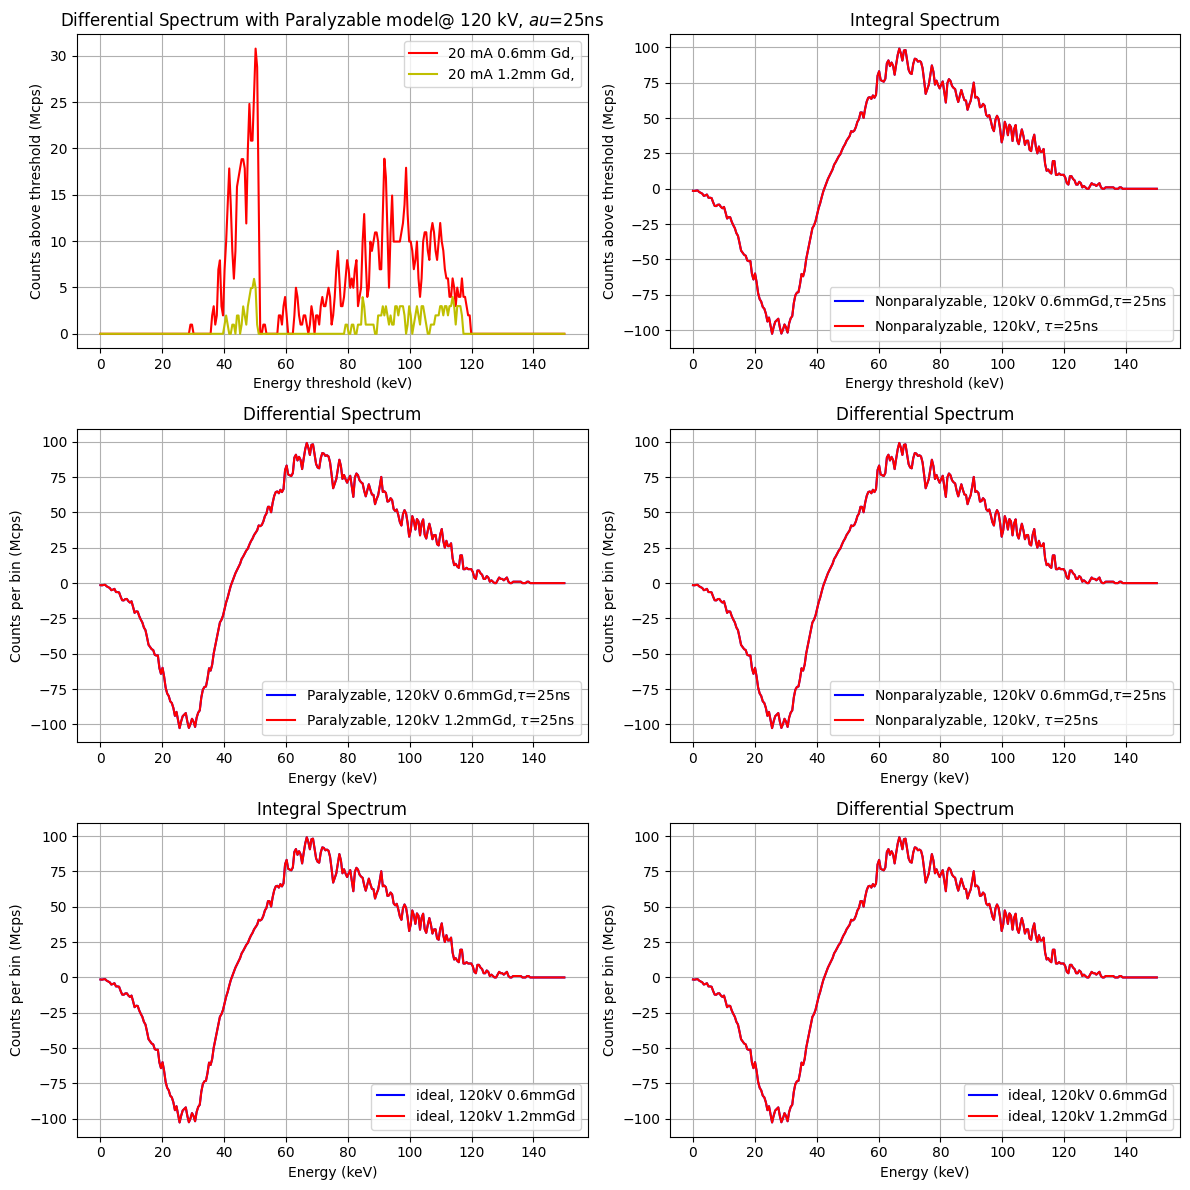

In [4]:
from counting_model_utils import plot_spectrum_subplot


# 定义绘图配置：每个子图一条记录
plot_configs = [
    # (axis位置, y列表, xlabel, ylabel, title)
    (321, [  # 左上 (row=2, col=2, index=1)
        # (Par_diff_120, 'b', r"20 mA without filter"),
        (Par_diff_120_Gd_0_6, 'r', r"20 mA 0.6mm Gd,"),
        (Par_diff_120_Gd_1_2, 'y', r"20 mA 1.2mm Gd,"),
     ], "Energy threshold (keV)", "Counts above threshold (Mcps)", "Differential Spectrum with Paralyzable model@ 120 kV, $\tau$=25ns"),

    (322, [
        (Par_diff_120, 'b', r"Nonparalyzable, 120kV 0.6mmGd,$\tau$=25ns"),
        (Par_diff_120, 'r', r"Nonparalyzable, 120kV, $\tau$=25ns"),
     ], "Energy threshold (keV)", "Counts above threshold (Mcps)", "Integral Spectrum"),

    (323, [
        (Par_diff_120, 'b', r"Paralyzable, 120kV 0.6mmGd,$\tau$=25ns"),
        (Par_diff_120, 'r', r"Paralyzable, 120kV 1.2mmGd, $\tau$=25ns"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Differential Spectrum"),

    (324, [
        (Par_diff_120, 'b', r"Nonparalyzable, 120kV 0.6mmGd,$\tau$=25ns"),
        (Par_diff_120, 'r', r"Nonparalyzable, 120kV, $\tau$=25ns"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Differential Spectrum"),
    (325, [
     (Par_diff_120, 'b', r"ideal, 120kV 0.6mmGd"),
     (Par_diff_120, 'r', r"ideal, 120kV 1.2mmGd"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Integral Spectrum"),
    (326, [
     (Par_diff_120, 'b', r"ideal, 120kV 0.6mmGd"),
     (Par_diff_120, 'r', r"ideal, 120kV 1.2mmGd"),
     ], "Energy (keV)", "Counts per bin (Mcps)", "Differential Spectrum"),

]

# ---------------- 绘图 ----------------
plt.figure(figsize=(12, 12))  # 高度调大些，避免挤

for subplot_id, curves, xlabel, ylabel, title in plot_configs:
    ax = plt.subplot(subplot_id)
    plot_spectrum_subplot(ax, thresholds, curves, xlabel, ylabel, title)

plt.tight_layout()
plt.show()


NameError: name 'Non_Par_int_120' is not defined

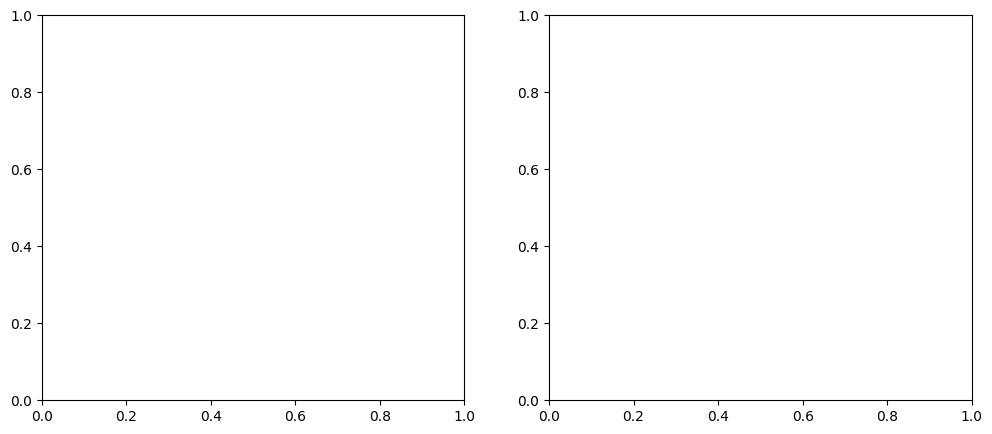

In [5]:
# ---------------- 比较不同计数模式的图片 ----------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# 积分谱
plot_spectrum_subplot(
    ax1, thresholds,
    [
        (Non_Par_int_120, 'b', r"Nonparalyzable, $\tau$=25ns"),
        (Par_int_120, 'r', r"Paralyzable, 120kV, $\tau$=25ns"),
    ],
    xlabel="Energy threshold (keV)",
    ylabel="Counts above threshold (Mcps)",
    title="Integral Spectrum"
)

# 微分谱
plot_spectrum_subplot(
    ax2, thresholds,
    [
        (Non_Par_diff_120, 'b', r"Nonparalyzable, $\tau$=25ns"),
        (Par_diff_120, 'r', r"Paralyzable, 120kV, $\tau$=25ns"),
    ],
    xlabel="Energy (keV)",
    ylabel="Counts per bin (Mcps)",
    title="Differential Spectrum"
)

plt.tight_layout()
plt.show()

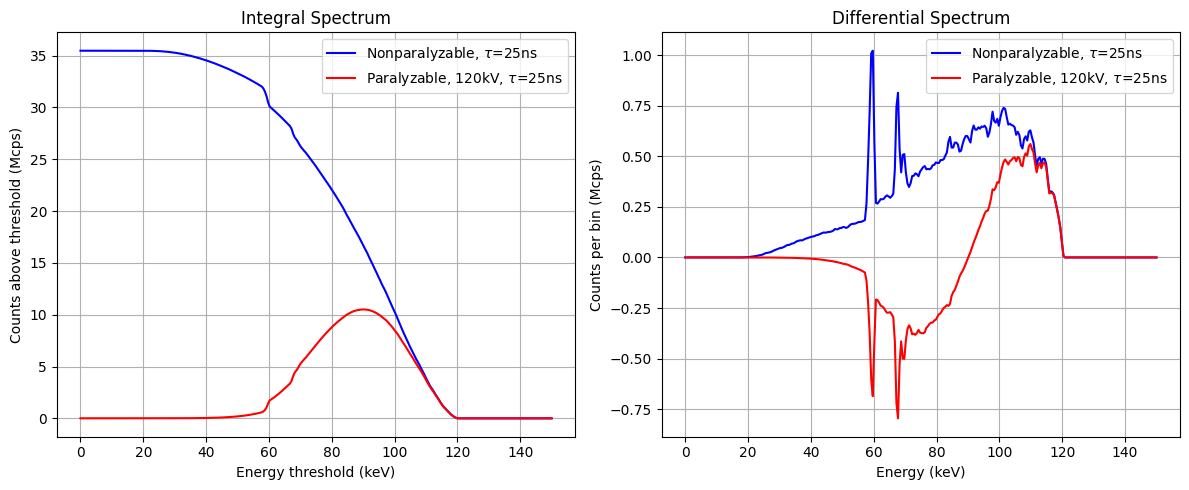

In [ ]:

# ---------------- 绘图 ----------------
plt.figure(figsize=(12,5))

# 积分谱
plt.subplot(1,2,1)
# plt.plot(thresholds, ideal_int_120/1e6, 'k', label="Ideal detector")
plt.plot(thresholds, Non_Par_int_120/1e6, 'b', label=r"Nonparalyzable, $\tau$=25ns")
plt.plot(thresholds, Par_int_120/1e6, 'r', label=r"Paralyzable, 120kV, $\tau$=25ns")
# plt.plot(thresholds, Par_int_noise/1e6, 'g', label=r"Paralyzable, dark, $\tau$=25ns")
# plt.plot(thresholds, Par_int_noise/1e6, 'g', label=r"Paralyzable, $\tau$=15ns")
plt.xlabel("Energy threshold (keV)")
plt.ylabel("Counts above threshold (Mcps)")
plt.title("Integral Spectrum")
plt.legend()
plt.grid(True)

# 微分谱
plt.subplot(1,2,2)
# plt.plot(thresholds, ideal_diff_120/1e6, 'k', label="Ideal detector")
plt.plot(thresholds, Non_Par_diff_120/1e6, 'b', label=r"Nonparalyzable, $\tau$=25ns")
plt.plot(thresholds, Par_diff_120/1e6, 'r', label=r"Paralyzable, 120kV, $\tau$=25ns")
# plt.plot(thresholds, diff_par_noise/1e6, 'g', label=r"Paralyzable, $\tau$=15ns")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts per bin (Mcps)")
plt.title("Differential Spectrum")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
